# Data Visualization

Once we have the data cleaned we can get to visualizing the data using various plots to get proper information from which we can get better conclusions and a broader view of the data given initially.

In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [198]:
df = pd.read_csv("../../data/attacks_clean.csv", encoding='unicode_escape')

In [199]:
# Set the general style for the plots
sns.set(style="darkgrid")

### Sample of the data contained in the dataset

In [248]:
df

,year,month,Type,Country,Area,Location,Activity,Sex,Age,Fatal,Species
0,2018,6,Boat,USA,California,"Oceanside, San Diego County",rowing sports,F,57.0,False,white
1,2018,6,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",standing,F,11.0,False,unknown
2,2018,6,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,surfing,M,NaN,False,unknown
3,2018,6,Provoked,MEXICO,Colima,La Ticla,diving,M,NaN,False,tiger
4,2018,6,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",surfing,M,NaN,False,unknown
...,...,...,...,...,...,...,...,...,...,...,...
4481,1900,9,Unprovoked,USA,Rhode Island,Coddington Cove,diving,M,NaN,True,NaN
4482,1900,9,Unprovoked,USA,Hawaii,"Waikiki Beach, Oahu",floating,M,NaN,False,unknown
4483,1900,8,Unprovoked,USA,North Carolina,"Southport, Brunswick County",bathing,M,NaN,False,unknown
4484,1900,7,Unprovoked,CROATIA,Primorje-Gorski Kotar County,"Volosko, Opatija",swimming,M,NaN,True,unknown


## General information

### Fatal vs Injured

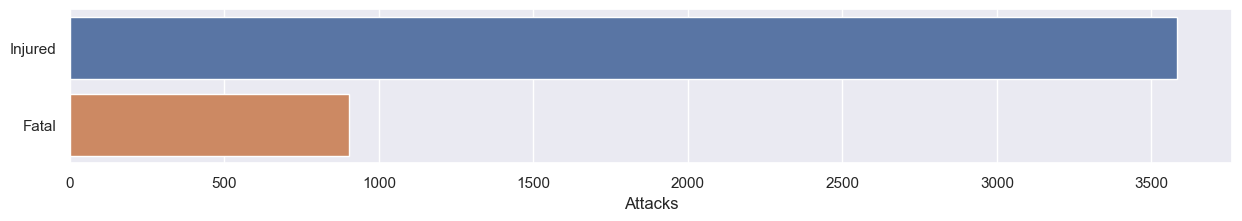

In [265]:
plt.figure(figsize = (15,2))
fatal = sns.countplot(data=df, y='Fatal')
fatal.set_yticklabels(["Injured", "Fatal"])
fatal.set(xlabel='Attacks', ylabel='')
plt.savefig('../../images/fatalvsinjured.png')

### Type of attacks

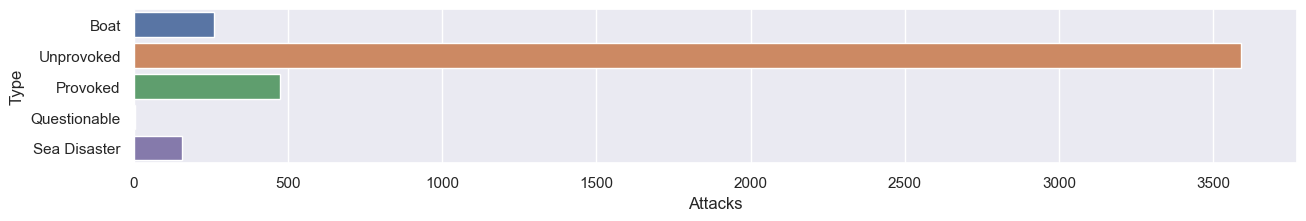

In [266]:
plt.figure(figsize = (15,2))
type_sex = sns.countplot(data=df, y="Type")
type_sex.set(xlabel='Attacks', ylabel='Type')
plt.savefig('../../images/type.png')

## Demographic visualization

### Attacks by sex of the victim

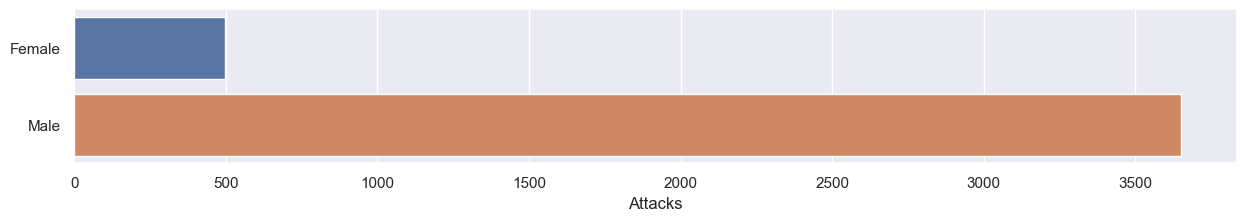

In [267]:
plt.figure(figsize = (15,2))
sex = sns.countplot(data=df, y='Sex')
sex.set(xlabel='Attacks', ylabel='')
sex.set_yticklabels(["Female", "Male"])
plt.savefig('../../images/sex.png')

### Attacks by sex and fatality

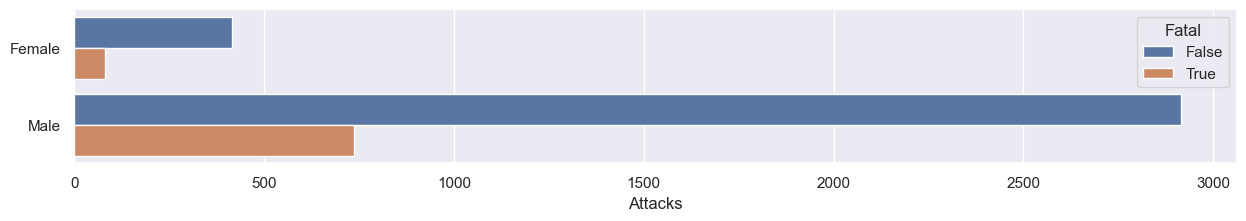

In [268]:
plt.figure(figsize = (15,2))
fatal_sex = sns.countplot(data=df, y="Sex", hue="Fatal")
fatal_sex.set_yticklabels(["Female", "Male"])
fatal_sex.set(xlabel='Attacks', ylabel='')
plt.savefig('../../images/sexfatal.png')

### Attacks by sex and type

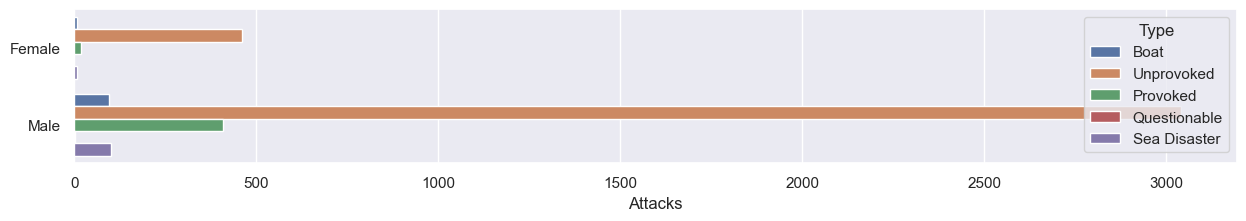

In [269]:
plt.figure(figsize = (15,2))
type_sex = sns.countplot(data=df, y="Sex", hue="Type")
type_sex.set_yticklabels(["Female", "Male"])
type_sex.set(xlabel='Attacks', ylabel='')
plt.savefig('../../images/sextype.png')

### Historic of attacks by age

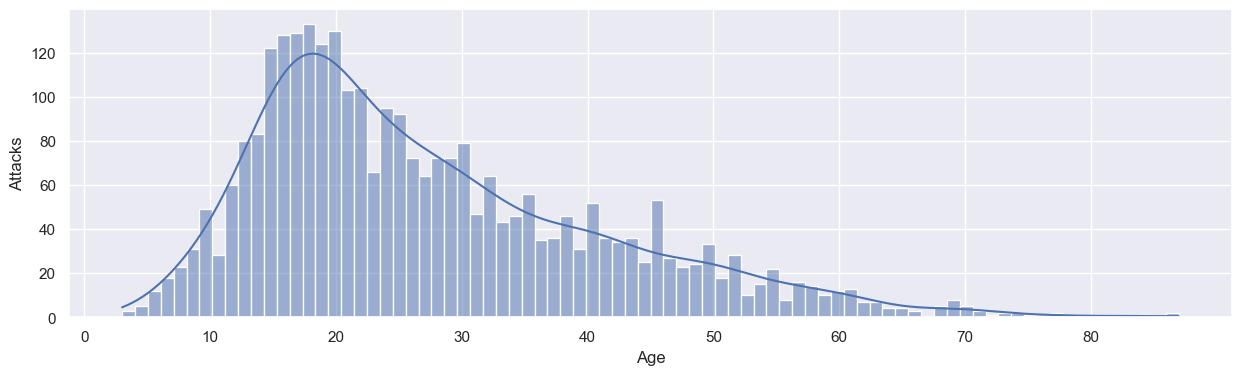

In [270]:
plt.figure(figsize = (15,4))
age = sns.histplot(data=df, x='Age', kde=True, bins=82)
age.set(xlabel='Age', ylabel='Attacks')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80], ['0','10','20','30','40','50','60','70','80'])
plt.savefig('../../images/age.png')

## Geographic visualization

### Comparision of Top3 countries with most attacks vs. the following seven

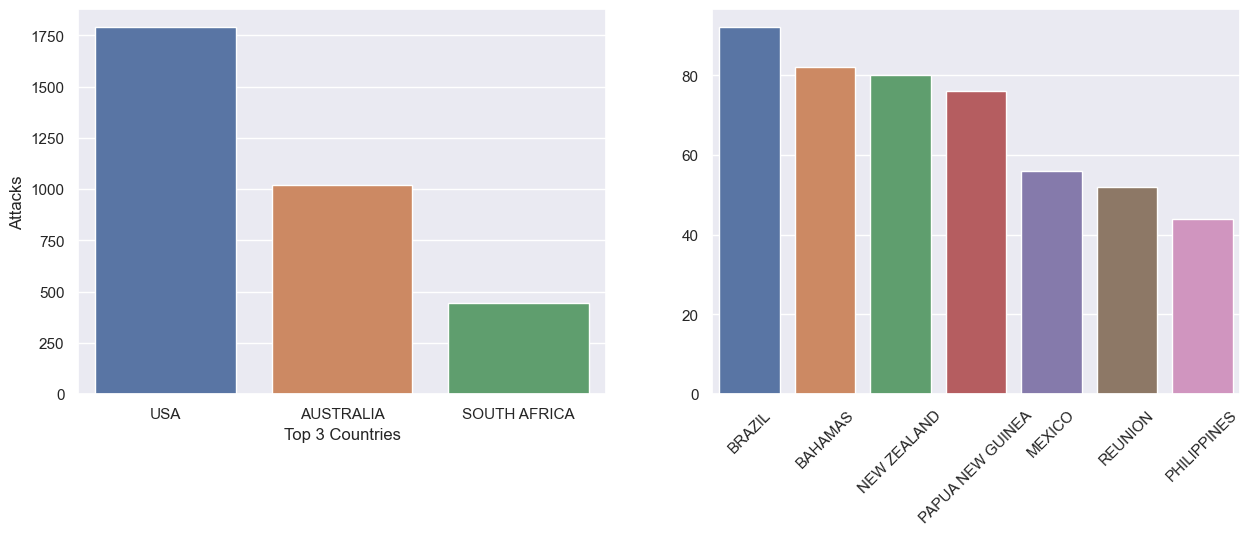

In [271]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
p1 = sns.countplot(data=df, x='Country', order=pd.value_counts(df['Country']).iloc[:3].index, ax = ax[0])
p2 = sns.countplot(data=df, x='Country', order=pd.value_counts(df['Country']).iloc[3:10].index, ax = ax[1])
plt.setp(p1.get_xticklabels(), rotation=0)
p1.set(xlabel='Top 3 Countries', ylabel='Attacks')
plt.setp(p2.get_xticklabels(), rotation=45)
p2.set(xlabel='', ylabel='')
plt.savefig('../../images/topcountries.png')

### Comparison of attacks per region in the Top3 most attacked countries

In [272]:
sub_usa = pd.DataFrame()
sub_usa["Area"] = df.loc[df["Country"] == 'USA'].Area

sub_aus = pd.DataFrame()
sub_aus["Area"] = df.loc[df["Country"] == 'AUSTRALIA'].Area

sub_sa = pd.DataFrame()
sub_sa["Area"] = df.loc[df["Country"] == 'SOUTH AFRICA'].Area

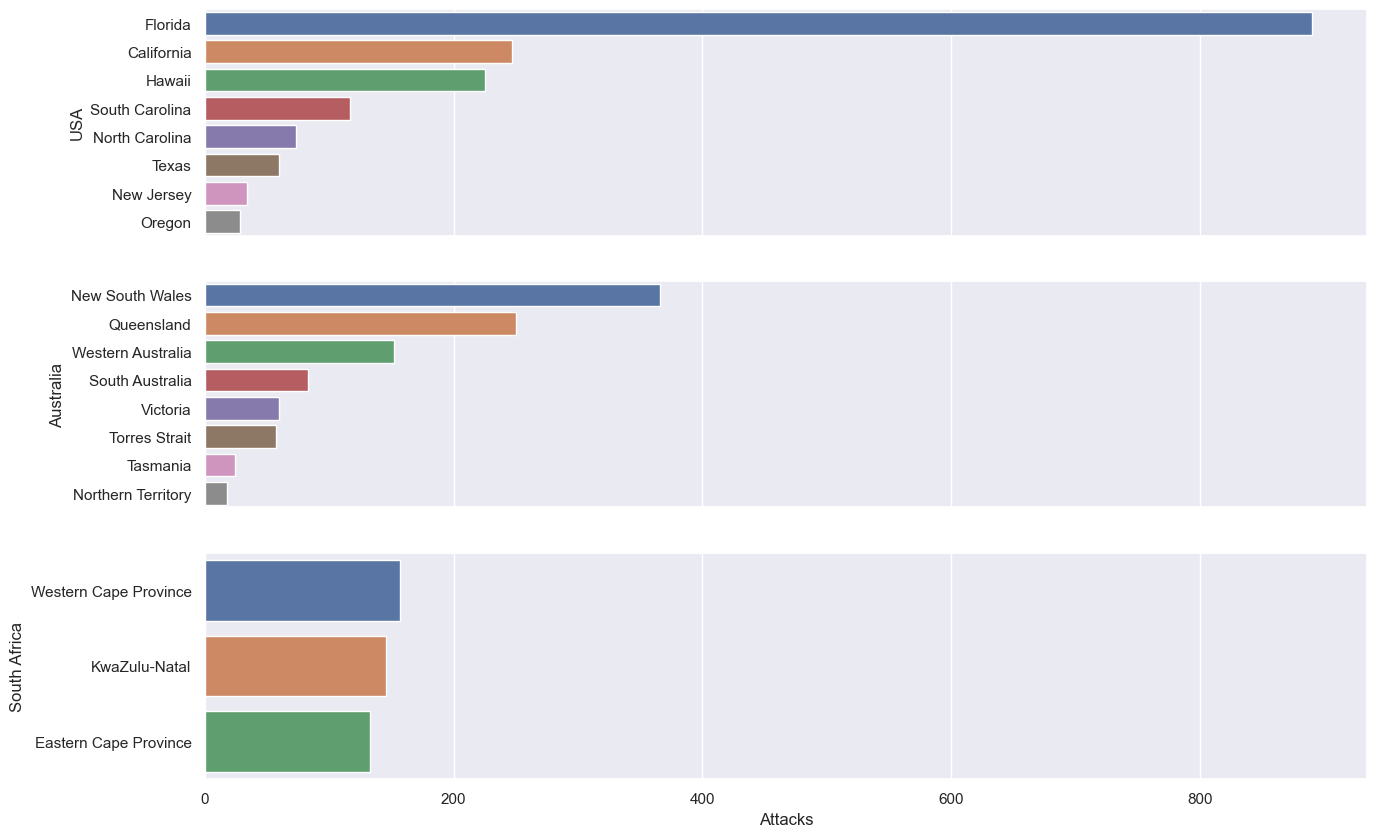

In [273]:
fig, ax = plt.subplots(3,1, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(15)

a1 = sns.countplot(y=sub_usa["Area"], order=sub_usa.Area.value_counts().iloc[:8].index, ax=ax[0])
a2 = sns.countplot(y=sub_aus["Area"], order=sub_aus.Area.value_counts().iloc[:8].index,ax=ax[1])
a3 = sns.countplot(y=sub_sa["Area"], order=sub_sa.Area.value_counts().iloc[:3].index,ax=ax[2])

a1.set(xlabel='', ylabel='USA')
a2.set(xlabel='', ylabel='Australia')
a3.set(xlabel='Attacks', ylabel='South Africa')
plt.savefig('../../images/top3areas.png')

## Historic visualization

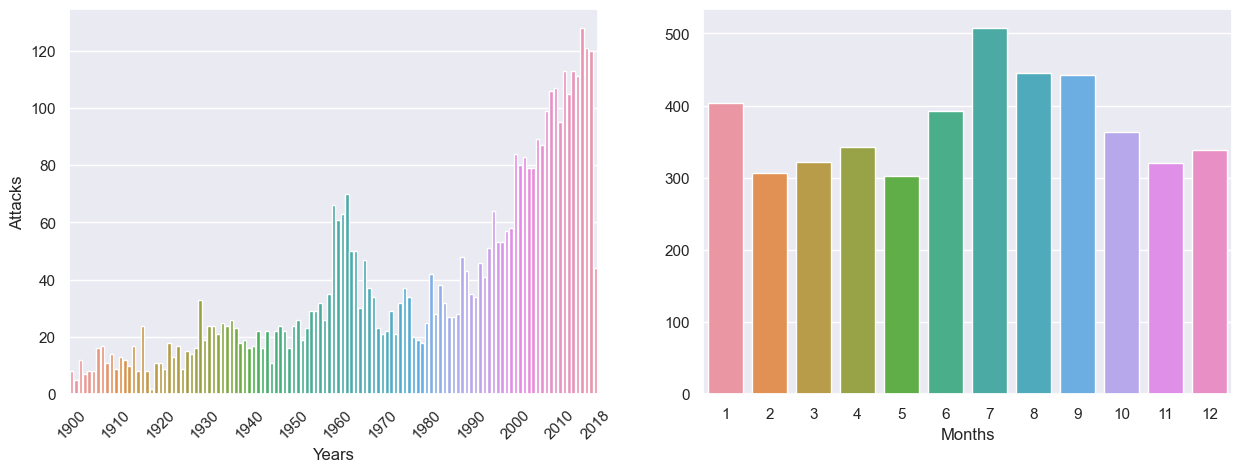

In [274]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)

year = sns.countplot(data=df, x='year', ax=ax[0])
year.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 118])
plt.setp(year.get_xticklabels(), rotation=45)
year.set(xlabel='Years', ylabel='Attacks')

month = sns.countplot(data=df, x='month', ax=ax[1])
plt.setp(month.get_xticklabels(), rotation=0)
month.set(xlabel='Months', ylabel='')
plt.savefig('../../images/historic.png')

### Historic of attacks by activity and fatality

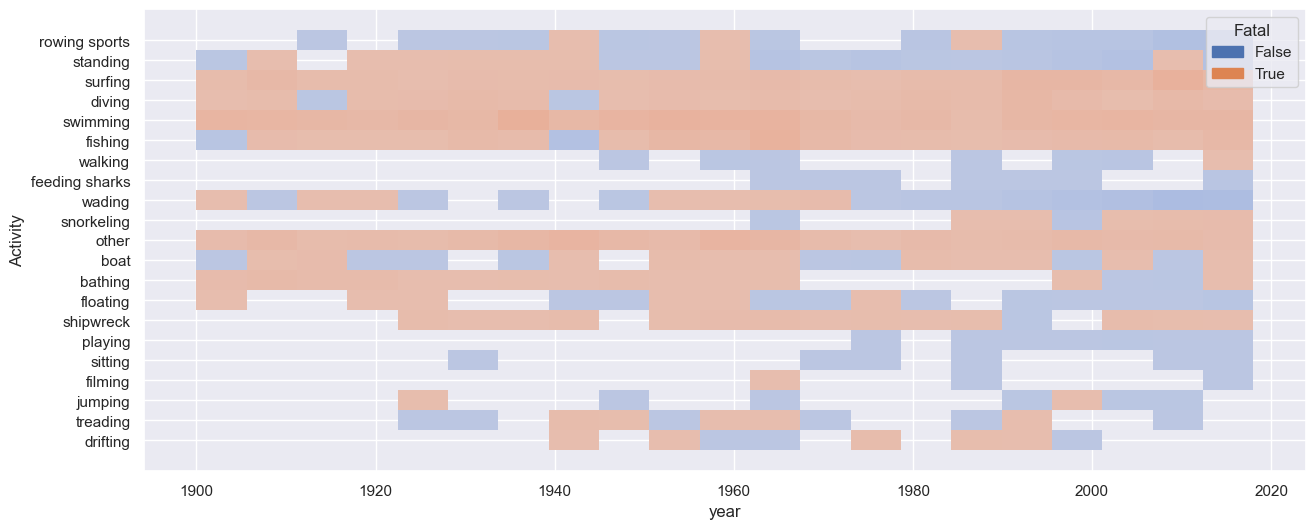

In [275]:
plt.figure(figsize = (15,6))
sns.histplot(data=df, x='year', y='Activity', hue='Fatal')
plt.savefig('../../images/activityfatal.png')

## Species visualization

### Total attacks by known/confirmed shark species

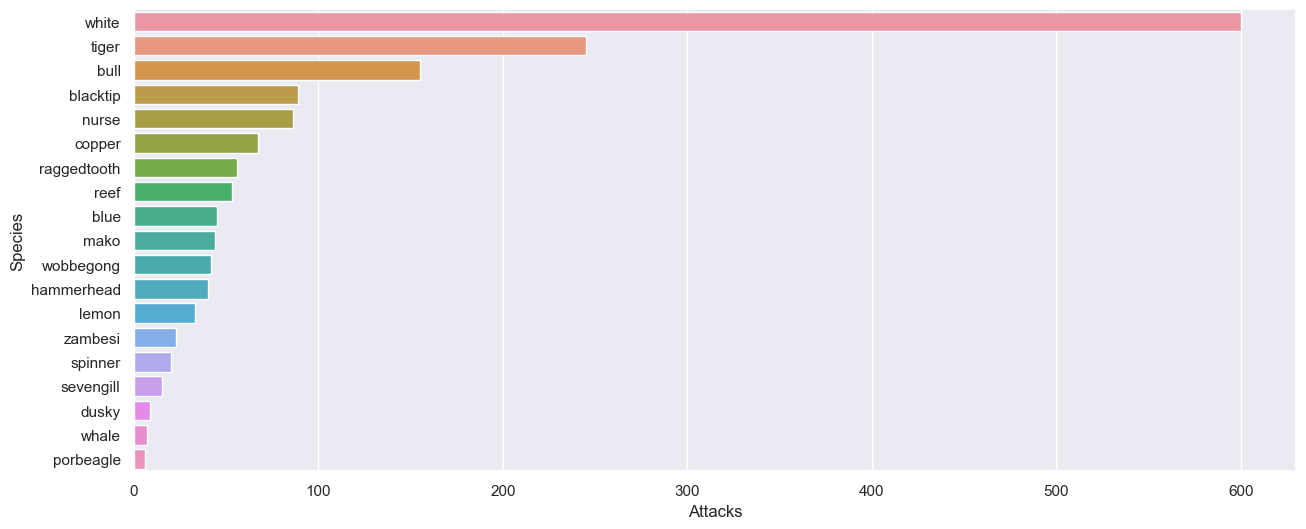

In [276]:
plt.figure(figsize = (15,6))
sharks = sns.countplot(y=df["Species"], order=df.Species.value_counts().iloc[1:20].index)
sharks.set(xlabel='Attacks', ylabel='Species')
plt.savefig('../../images/species.png')

### Attacks by species, comparing Fatal and non Fatal attacks

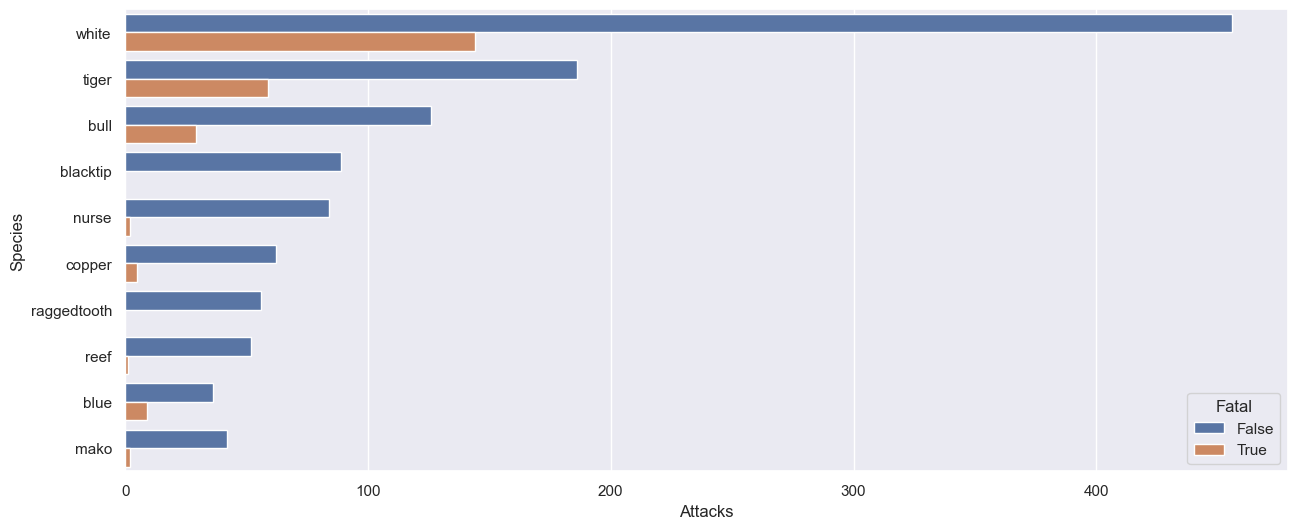

In [277]:
plt.figure(figsize = (15,6))
fatal_species = sns.countplot(data=df, y="Species", hue="Fatal",order=df.Species.value_counts().iloc[1:11].index)
fatal_species.set(xlabel='Attacks', ylabel='Species')
plt.savefig('../../images/speciesfatal.png')

### Historic of attacks by specie and fatality

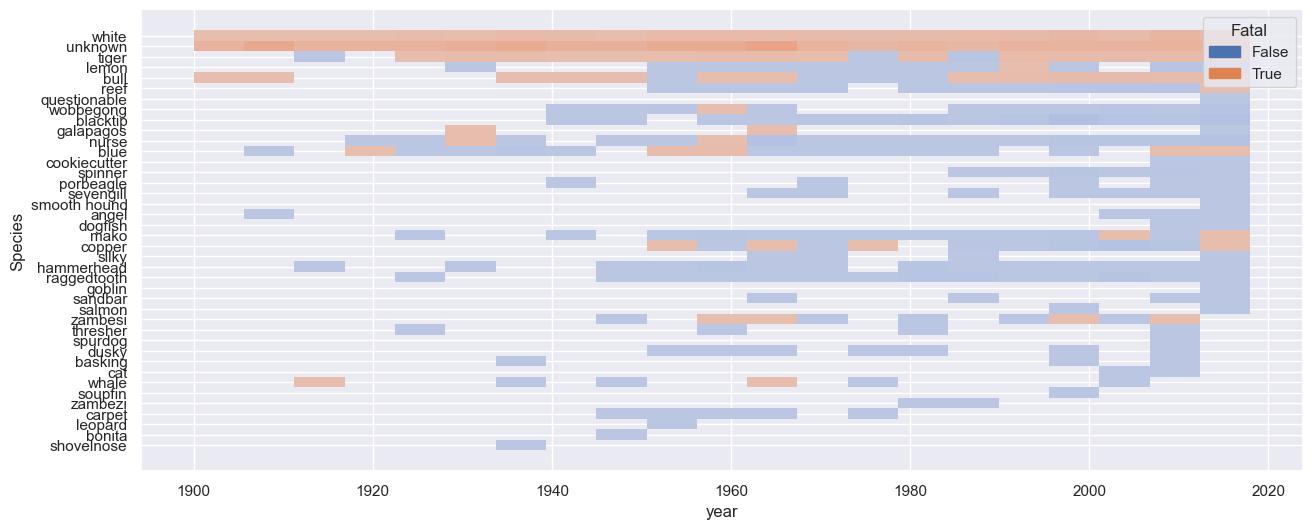

In [278]:
plt.figure(figsize = (15,6))
p = sns.histplot(data=df, x='year', y='Species', hue='Fatal')
plt.savefig('../../images/histspeciesfatal.png')

### Attacks by species, activity and fatality

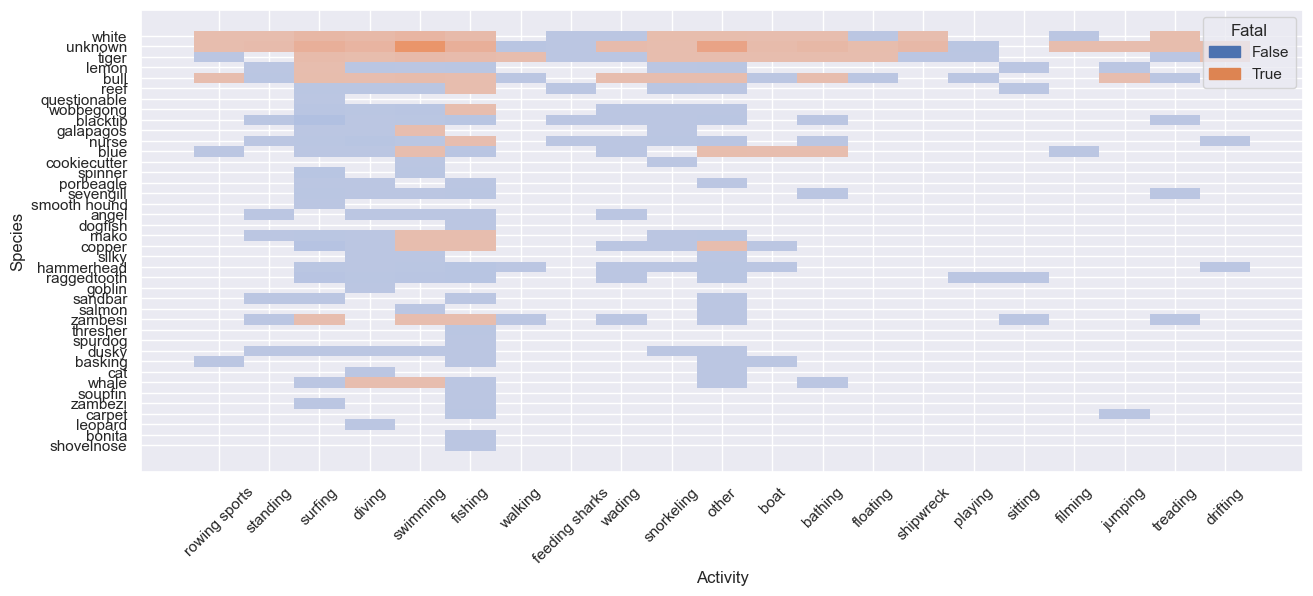

In [279]:
plt.figure(figsize = (15,6))
activity_species = sns.histplot(data=df, x='Activity', y='Species', hue='Fatal')
plt.setp(activity_species.get_xticklabels(), rotation=45)
plt.savefig('../../images/speciesactivityfatal.png')